__This script creates datasets containing annual temperature anomalies (normalized to a specified baseline) for the CMIP5 data and the observation data.__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 15

In [17]:
CMIP_PATH = "../data/raw/CMIP5/"
OBS_PATH = "../data/raw/Observed_Temperatures/"

# Baseline [BL, BU]
BL = 1961
BU = 1990

In [18]:
# Read RCP data
rcp85 = pd.read_table(CMIP_PATH+"global_tas_Amon_modmean_rcp85_000.dat", skiprows=5, header=None, sep='\s+')
rcp60 = pd.read_table(CMIP_PATH+"global_tas_Amon_modmean_rcp60_000.dat", skiprows=5, header=None, sep='\s+')
rcp45 = pd.read_table(CMIP_PATH+"global_tas_Amon_modmean_rcp45_000.dat", skiprows=5, header=None, sep='\s+')
rcp26 = pd.read_table(CMIP_PATH+"global_tas_Amon_modmean_rcp26_000.dat", skiprows=5, header=None, sep='\s+')

# Calculate annual averages
rcp85.iloc[:,1] = rcp85.iloc[:,1:].mean(axis=1)
rcp85 = rcp85.iloc[:,0:2]
rcp85.columns = ['year', 't']

rcp60.iloc[:,1] = rcp60.iloc[:,1:].mean(axis=1)
rcp60 = rcp60.iloc[:,0:2]
rcp60.columns = ['year', 't']

rcp45.iloc[:,1] = rcp45.iloc[:,1:].mean(axis=1)
rcp45 = rcp45.iloc[:,0:2]
rcp45.columns = ['year', 't']

rcp26.iloc[:,1] = rcp26.iloc[:,1:].mean(axis=1)
rcp26 = rcp26.iloc[:,0:2]
rcp26.columns = ['year', 't']

# Normalize to baseline
rcp85['t'] = rcp85['t'] - rcp85[(rcp85['year']>=BL) & (rcp85['year']<=BU)]['t'].mean()
rcp60['t'] = rcp60['t'] - rcp60[(rcp60['year']>=BL) & (rcp60['year']<=BU)]['t'].mean()
rcp45['t'] = rcp45['t'] - rcp45[(rcp45['year']>=BL) & (rcp45['year']<=BU)]['t'].mean()
rcp26['t'] = rcp26['t'] - rcp26[(rcp26['year']>=BL) & (rcp26['year']<=BU)]['t'].mean()

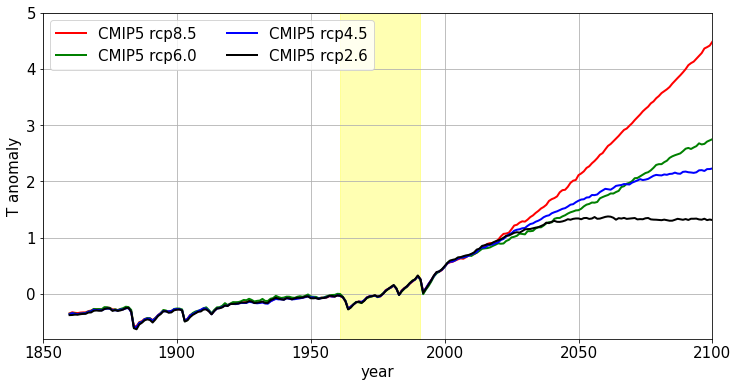

In [19]:
plt.subplots(figsize=(12,6))

plt.plot(rcp85['year'], rcp85['t'], label='CMIP5 rcp8.5', lw=2, c='r')
plt.plot(rcp60['year'], rcp60['t'], label='CMIP5 rcp6.0', lw=2, c='g')
plt.plot(rcp45['year'], rcp45['t'], label='CMIP5 rcp4.5', lw=2, c='b')
plt.plot(rcp26['year'], rcp26['t'], label='CMIP5 rcp2.6', lw=2, c='k')

plt.fill_betweenx(y=[-1.,5], x1=BL, x2=BU+1, color='yellow', alpha=0.3)

plt.xlim(1850, 2100)
plt.ylim(-0.8, 5)

plt.grid()
plt.xlabel("year")
plt.ylabel("T anomaly")
plt.legend(ncol=2)
plt.show()

In [20]:
# Create combined DataFrame
df = pd.DataFrame()
df['year'] = rcp26['year']
df['rcp26'] = rcp26['t']
df['rcp45'] = rcp45['t']
df['rcp60'] = rcp60['t']
df['rcp85'] = rcp85['t']

# Write the DataFrame
#df.to_csv("../data/preprocessed/CMIP5_TAnom.csv", sep='\t', index=False)
df

,year,rcp26,rcp45,rcp60,rcp85
0,1860,-0.378501,-0.362754,-0.353943,-0.347694
1,1861,-0.376551,-0.343029,-0.349152,-0.328102
2,1862,-0.370101,-0.356779,-0.347760,-0.337719
3,1863,-0.371976,-0.360196,-0.361102,-0.342511
4,1864,-0.362801,-0.352287,-0.352802,-0.334403
...,...,...,...,...,...
236,2096,1.318233,2.199421,2.656382,4.281656
237,2097,1.335308,2.184313,2.666107,4.362564
238,2098,1.310658,2.217646,2.706890,4.386531
239,2099,1.320933,2.218671,2.727982,4.414764


In [21]:
# Berkeley data normalized to (1951-1980)
berkeley = pd.read_table(OBS_PATH+"berkeley.txt", skiprows=48, sep='\s+', header=None)
berkeley = berkeley.iloc[:,0:2]
berkeley.columns = ['year', 't']
berkeley = berkeley[berkeley['year']>=1880]
berkeley = berkeley[berkeley['year']<2020]
berkeley['t'] = berkeley['t'] - berkeley[(berkeley['year']>=BL) & (berkeley['year']<=BU)]['t'].mean()

In [22]:
# Gistemp data normalized to (1951-1980)
gistemp = pd.read_table(OBS_PATH+"gistemp.txt", skiprows=13, sep='\s+')
gistemp = gistemp[['Year', 'J-D']]
gistemp.columns = ['year', 't']
gistemp = gistemp[gistemp['year']>=1880]
gistemp = gistemp[gistemp['year']<2020]
gistemp['t'] = [0.01*float(x) for x in gistemp['t']]
gistemp['t'] = gistemp['t'] - gistemp[(gistemp['year']>=BL) & (gistemp['year']<=BU)]['t'].mean()

In [23]:
hadcrut4 = pd.read_table(OBS_PATH+"hadcrut4.txt", sep='\s+', header=None)
hadcrut4 = hadcrut4.iloc[:,0:2]
hadcrut4.columns = ['year', 't']
hadcrut4 = hadcrut4[hadcrut4['year']>=1880]
hadcrut4 = hadcrut4[hadcrut4['year']<2020]
hadcrut4['t'] = hadcrut4['t'] - hadcrut4[(hadcrut4['year']>=BL) & (hadcrut4['year']<=BU)]['t'].mean()

In [24]:
cowtan_way = pd.read_table(OBS_PATH+"cowtan_way.txt", sep='\s+', header=None)
cowtan_way = cowtan_way.iloc[:,0:2]
cowtan_way.columns = ['year', 't']
cowtan_way = cowtan_way[cowtan_way['year']>=1880]
cowtan_way = cowtan_way[cowtan_way['year']<2020]
cowtan_way['year'] = [int(y) for y in cowtan_way['year']]
cowtan_way = cowtan_way.groupby('year').mean().reset_index()
cowtan_way['t'] = cowtan_way['t'] - cowtan_way[(cowtan_way['year']>=BL) & (cowtan_way['year']<=BU)]['t'].mean()

In [25]:
# Noaa data normalized to (1901-2000)
noaa = pd.read_csv(OBS_PATH+"noaa.csv", skiprows=5, names=['year', 't'])
noaa['year'] = [int(y/100) for y in noaa['year']]
noaa = noaa[noaa['year']>=1880]
noaa = noaa[noaa['year']<2020]
noaa = noaa.groupby('year').mean().reset_index()
noaa['t'] = noaa['t'] - noaa[(noaa['year']>=BL) & (noaa['year']<=BU)]['t'].mean()

In [26]:
data = pd.merge(hadcrut4, gistemp, how='outer', on='year')
data = pd.merge(data, noaa, how='outer', on='year')
data = pd.merge(data, berkeley, how='outer', on='year')
data = pd.merge(data, cowtan_way, how='outer', on='year')
data.columns = ['year', 'hadcrut4', 'gistemp', 'noaa', 'berkeley', 'cowtan_way']

# Write the DataFrame
#data.to_csv("../data/preprocessed/Observations_TAnom.csv", sep='\t', index=False)
data

,year,hadcrut4,gistemp,noaa,berkeley,cowtan_way
0,1880,-0.226267,-0.26,-0.256139,-0.393867,-0.296242
1,1881,-0.199267,-0.17,-0.219472,-0.280867,-0.235742
2,1882,-0.212267,-0.20,-0.232806,-0.342867,-0.294325
3,1883,-0.295267,-0.26,-0.316139,-0.388867,-0.348075
4,1884,-0.408267,-0.38,-0.401139,-0.555867,-0.510158
...,...,...,...,...,...,...
135,2015,0.763733,0.80,0.794694,0.752133,0.753675
136,2016,0.797733,0.92,0.859694,0.888133,0.865342
137,2017,0.677733,0.83,0.774694,0.773133,0.729758
138,2018,0.597733,0.76,0.692194,0.707133,0.672925


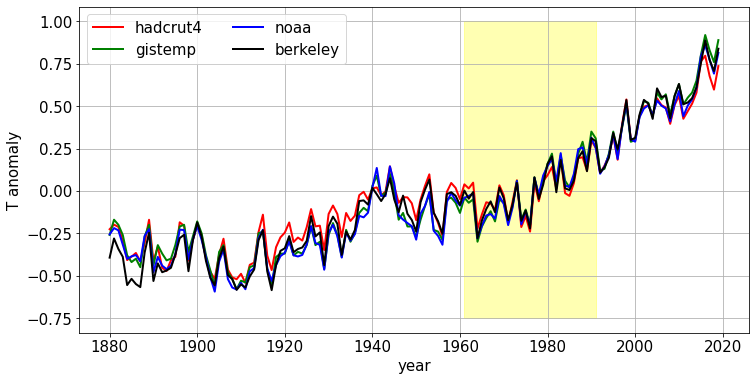

In [27]:
plt.subplots(figsize=(12,6))

plt.plot(data['year'], data['hadcrut4'], label='hadcrut4', lw=2, c='r')
plt.plot(data['year'], data['gistemp'], label='gistemp', lw=2, c='g')
plt.plot(data['year'], data['noaa'], label='noaa', lw=2, c='b')
plt.plot(data['year'], data['berkeley'], label='berkeley', lw=2, c='k')

plt.fill_betweenx(y=[-0.75,1], x1=BL, x2=BU+1, color='yellow', alpha=0.3)

plt.grid()
plt.xlabel("year")
plt.ylabel("T anomaly")
plt.legend(ncol=2)
plt.show()